_**DELETE BEFORE PUBLISHING**_

_This is a template also containing the style guide for use cases. The styling uses the use-case css when uploaded to the website, which will not be visible on your local machine._

_Change any text marked with {} and delete any cells marked DELETE_

***

In [ ]:
# DELETE BEFORE PUBLISHING
# This is just here so you can preview the styling on your local machine

from IPython.core.display import HTML
HTML("""
<style>
.usecase-title, .usecase-duration, .usecase-section-header {
    padding-left: 15px;
    padding-bottom: 10px;
    padding-top: 10px;
    padding-right: 15px;
    background-color: #0f9295;
    color: #fff;
}

.usecase-title {
    font-size: 1.7em;
    font-weight: bold;
}

.usecase-authors, .usecase-level, .usecase-skill {
    padding-left: 15px;
    padding-bottom: 7px;
    padding-top: 7px;
    background-color: #baeaeb;
    font-size: 1.4em;
    color: #121212;
}

.usecase-level-skill  {
    display: flex;
}

.usecase-level, .usecase-skill {
    width: 50%;
}

.usecase-duration, .usecase-skill {
    text-align: right;
    padding-right: 15px;
    padding-bottom: 8px;
    font-size: 1.4em;
}

.usecase-section-header {
    font-weight: bold;
    font-size: 1.5em;
}

.usecase-subsection-header, .usecase-subsection-blurb {
    font-weight: bold;
    font-size: 1.2em;
    color: #121212;
}

.usecase-subsection-blurb {
    font-size: 1em;
    font-style: italic;
}
</style>
""")

<div class="usecase-title">Parking Availability</div>

<div class="usecase-authors"><b>Authored by: </b> Angie Hollingworth, Siju Deng</div>

<div class="usecase-duration"><b>Duration:</b> {90} mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>{Intermediate}</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>{Python, and add any more skills needed}</div>
</div>

<div class="usecase-section-header">Scenario</div>

{Using User Story format, write a description of the problem you are trying to solve for this use case.}

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- {list the skills demonstrated in your use case}

<div class="usecase-section-header">{Heading for introduction or background relating to problem}</div>

{Write your introduction here. Keep it concise. We're not after "War and Peace" but enough background information to inform the reader on the rationale for solving this problem or background non-technical information that helps explain the approach. You may also wish to give information on the datasets, particularly how to source those not being imported from the client's open data portal.}



***

_**DELETE BEFORE PUBLISHING**_

## Style guide for use cases

### Headers

For styling within your markdown cells, there are two choices you can use for headers.

1) You can use HTML classes specific to the use case styling:

```<p class="usecase-subsection-header">This is a subsection header.</p>```

<p style="font-weight: bold; font-size: 1.2em;">This is a subsection header.</p>

```<p class="usecase-subsection-blurb">This is a blurb header.</p>```

<p style="font-weight: bold; font-size: 1em; font-style:italic;">This is a blurb header.</p>


2) Or if you like you can use the markdown header styles:

```# for h1```

```## for h2```

```### for h3```

```#### for h4```

```##### for h5```

## Plot colour schemes

General advice:
1. Use the same colour or colour palette throughout your notebook, unless variety is necessary
2. Select a palette based on the type of data being represented
3. Consider accessibility (colourblindness, low vision)

#### 1) If all of your plots only use 1-2 colors use one of the company style colors:

| Light theme | Dark Theme |
|-----|-----|
|<p style="color:#2af598;">#2af598</p>|<p style="color:#08af64;">#08af64</p>|
|<p style="color:#22e4ac;">#22e4ac</p>|<p style="color:#14a38e;">#14a38e</p>|
|<p style="color:#1bd7bb;">#1bd7bb</p>|<p style="color:#0f9295;">#0f9295</p>|
|<p style="color:#14c9cb;">#14c9cb</p>|<p style="color:#056b8a;">#056b8a</p>|
|<p style="color:#0fbed8;">#0fbed8</p>|<p style="color:#121212;">#121212</p>|
|<p style="color:#08b3e5;">#08b3e5</p>||


#### 2) If your plot needs multiple colors, choose an appropriate palette using either of the following tutorials:
- https://seaborn.pydata.org/tutorial/color_palettes.html
- https://matplotlib.org/stable/tutorials/colors/colormaps.html

#### 3) Consider accessibility as well.

For qualitative plotting Seaborn's 'colorblind' palette is recommended. For maps with sequential or diverging it is recommended to use one of the Color Brewer schemes which can be previewed at https://colorbrewer2.org/.

If you want to design your own colour scheme, it should use the same principles as Cynthia Brewer's research (with variation not only in hue but also, saturation or luminance).

### References

Be sure to acknowledge your sources and any attributions using links or a reference list.

If you have quite a few references, you might wish to have a dedicated section for references at the end of your document, linked using footnote style numbers.

You can connect your in-text reference by adding the number with a HTML link: ```<a href="#fn-1">[1]</a>```

and add a matching ID in the reference list using the ```<fn>``` tag: ```<fn id="fn-1">[1] Author (Year) _Title_, Publisher, Publication location.</fn>```

### new

In [ ]:
import os
import requests
import pandas as pd

# Fetch parking data from API
def fetch_parking_data(base_url, dataset, api_key, num_records=99, offset=0):
    all_records = []
    max_offset = 9900  # Set a maximum offset value based on API limitations

    while True:
        if offset > max_offset:
            break

        filters = f'{dataset}/records?limit={num_records}&offset={offset}'
        url = f'{base_url}{filters}&{api_key}'
        try:
            result = requests.get(url, timeout=10)
            result.raise_for_status()
            records = result.json().get('results')
        except requests.exceptions.RequestException as e:
            raise Exception(f"API request failed: {e}")

        if records is None:
            break
        all_records.extend(records)
        if len(records) < num_records:
            break
        offset += num_records

    df = pd.DataFrame(all_records)
    return df

API_KEY = os.environ.get('MELBOURNE_API_KEY', input("Please enter your API key: "))
BASE_URL = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'

Please enter your API key: 558000cd83c1d1ba8c4a5e09e0063424750542b70b132293e63b645a


In [ ]:
SENSOR_DATASET = 'on-street-parking-bay-sensors'

df = fetch_parking_data(BASE_URL, SENSOR_DATASET, API_KEY)

# Extract latitude and longitude
df['location_lat'] = df['location'].apply(lambda x: x.get('lat', None))
df['location_lon'] = df['location'].apply(lambda x: x.get('lon', None))

# Drop the original location column
df.drop(columns=['location'], inplace=True)

# Display the DataFrame
print(df.head())


                 lastupdated           status_timestamp  zone_number  \
0  2023-07-20T05:44:36+00:00  2023-07-19T21:24:38+00:00       7358.0   
1  2023-07-20T05:44:36+00:00  2023-07-20T05:23:46+00:00       7358.0   
2  2023-07-20T05:44:36+00:00  2023-07-20T04:46:01+00:00       7358.0   
3  2023-07-24T06:44:36+00:00  2023-07-24T06:16:08+00:00       7638.0   
4  2023-07-24T06:44:36+00:00  2023-07-24T05:50:20+00:00       7638.0   

  status_description  parkingbay_id  location_lat  location_lon  
0         Unoccupied           7075    -37.814591    144.969350  
1            Present           7076    -37.814569    144.969424  
2         Unoccupied           7077    -37.814547    144.969500  
3         Unoccupied           5852    -37.813205    144.968283  
4         Unoccupied           5874    -37.813361    144.968354  


In [ ]:
df

lastupdated           status_timestamp  zone_number  \
0     2023-07-20T05:44:36+00:00  2023-07-19T21:24:38+00:00       7358.0   
1     2023-07-20T05:44:36+00:00  2023-07-20T05:23:46+00:00       7358.0   
2     2023-07-20T05:44:36+00:00  2023-07-20T04:46:01+00:00       7358.0   
3     2023-07-24T06:44:36+00:00  2023-07-24T06:16:08+00:00       7638.0   
4     2023-07-24T06:44:36+00:00  2023-07-24T05:50:20+00:00       7638.0   
...                         ...                        ...          ...   
5172  2023-09-06T00:22:36+00:00  2023-09-05T21:19:00+00:00       7083.0   
5173  2023-09-06T00:22:36+00:00  2023-09-05T11:25:20+00:00       7083.0   
5174  2023-09-06T00:22:36+00:00  2023-09-05T20:04:22+00:00       7083.0   
5175  2023-09-06T00:22:36+00:00  2023-09-05T20:16:14+00:00       7083.0   
5176  2023-09-06T00:22:36+00:00  2023-09-05T23:38:37+00:00       7012.0   

     status_description  parkingbay_id  location_lat  location_lon  
0            Unoccupied           7075    -37.814591    144.969350  
1               Present           7076    -37.814569    144.969424  
2            Unoccupied           7077    -37.814547    144.969500  
3            Unoccupied           5852    -37.813205    144.968283  
4            Unoccupied           5874    -37.813361    144.968354  
...                 ...            ...           ...           ...  
5172            Present           9033    -37.801963    144.958754  
5173         Unoccupied           9036    -37.801979    144.958900  
5174            Present           9040    -37.801998    144.959076  
5175            Present           9043    -37.801960    144.958725  
5176            Present           9084    -37.803109    144.959088  

[5177 rows x 7 columns]

### old

In [ ]:
# import pandas as pd
# from sodapy import Socrata

# # find the parking dataset @ https://data.melbourne.vic.gov.au/Transport/On-street-Parking-Bay-Sensors/vh2v-4nfs
# parking_dataset_id = 'vh2v-4nfs'
# # app tokens are just used to manage throttling (not authentication)
# app_token = '[your app token]' #find out about app tokens @ https://dev.socrata.com/docs/app-tokens.html
# bucket = 'opendataplayground.deakin'

# # Access open data through Socrata client
# client = Socrata(
#     "data.melbourne.vic.gov.au",
#     app_token,
#     timeout=120
# )

# # read snapshot of parking sensors status
# api_results = client.get_all(parking_dataset_id)
# parking_sensors = pd.DataFrame.from_dict(api_results)
# parking_sensors = parking_sensors.astype({'lat':'float64', 'lon':'float64'})
# # remove duplicates found in the parking sensor data
# parking_sensors = parking_sensors.drop_duplicates()
# parking_sensors[['lat', 'lon', 'status']].to_json('./latest_parking_sensors.json')


#### Function to get full dataset

### new

In [ ]:
def validate_data(df):
    print("\nChecking for NaN values:")
    print(df.isna().sum())
    print("\nChecking for Duplicates:")
    print(df.duplicated().sum())
    print("\nChecking data types:")
    print(df.dtypes)

validate_data(df)


Checking for NaN values:
lastupdated             0
status_timestamp        0
zone_number           399
status_description      0
parkingbay_id           0
location_lat            0
location_lon            0
dtype: int64

Checking for Duplicates:
0

Checking data types:
lastupdated            object
status_timestamp       object
zone_number           float64
status_description     object
parkingbay_id           int64
location_lat          float64
location_lon          float64
dtype: object


In [ ]:
# Create a new DataFrame for analysis based on the original df
df_analysis = df.copy()

# Convert 'lastupdated' and 'status_timestamp' to datetime objects
df_analysis['lastupdated'] = pd.to_datetime(df_analysis['lastupdated'])
df_analysis['status_timestamp'] = pd.to_datetime(df_analysis['status_timestamp'])

# Identify the most recent timestamp
latest_timestamp = df_analysis['status_timestamp'].max()

# Calculate the date one year ago from the most recent timestamp
one_year_ago = latest_timestamp - pd.DateOffset(years=1)

# Identify rows with 'status_timestamp' older than one year
outdated_rows = df_analysis[df_analysis['status_timestamp'] < one_year_ago].copy()

# Print these outdated rows, sorted by 'status_timestamp'
print("Outdated rows:")
print(outdated_rows.sort_values(by='status_timestamp').head())

# Print the data header sorted by 'status_timestamp'
print("\nData header sorted by time:")
print(df_analysis.sort_values(by='status_timestamp').head())

# Delete outdated rows
df_analysis = df_analysis[df_analysis['status_timestamp'] >= one_year_ago]


Outdated rows:
                   lastupdated          status_timestamp  zone_number  \
4256 2023-09-06 00:22:36+00:00 1970-01-01 00:00:00+00:00       7112.0   
3215 2023-09-06 00:22:36+00:00 2022-07-27 23:03:14+00:00       7062.0   
4664 2023-09-06 00:22:36+00:00 2022-08-02 08:41:19+00:00          NaN   

     status_description  parkingbay_id  location_lat  location_lon  
4256         Unoccupied          23650    -37.801596    144.969723  
3215         Unoccupied          21358    -37.803218    144.962660  
4664         Unoccupied          24999    -37.809305    144.974109  

Data header sorted by time:
                   lastupdated          status_timestamp  zone_number  \
4256 2023-09-06 00:22:36+00:00 1970-01-01 00:00:00+00:00       7112.0   
3215 2023-09-06 00:22:36+00:00 2022-07-27 23:03:14+00:00       7062.0   
4664 2023-09-06 00:22:36+00:00 2022-08-02 08:41:19+00:00          NaN   
4386 2023-09-06 00:22:36+00:00 2022-09-13 04:38:23+00:00       7247.0   
366  2023-09-06 00:22:

In [ ]:
# Detect duplicates based on all columns
duplicates = df_analysis.duplicated(subset=['parkingbay_id','status_description','location_lat','location_lon'], keep=False)

# Display duplicates
print("Duplicate Rows based on all columns are:")
print(df_analysis[duplicates].sort_values('parkingbay_id'))


Duplicate Rows based on all columns are:
Empty DataFrame
Columns: [lastupdated, status_timestamp, zone_number, status_description, parkingbay_id, location_lat, location_lon]
Index: []


In [ ]:
# Remove duplicates based on specified columns in df_analysis
df_analysis.drop_duplicates(subset=['parkingbay_id', 'status_description', 'location_lat', 'location_lon', 'lastupdated'], keep='first', inplace=True)



### Try to analyze the data directly

### doesn't seem to be available, try calculating

In [ ]:
import folium

# Initialize the map centered around a latitude and longitude
m = folium.Map(location=[-37.814, 144.963], zoom_start=16)  # 16 is the zoom level

# Add points to the map using df_analysis
for idx, row in df_analysis.iterrows():
    color = "blue" if row['status_description'] == "Unoccupied" else "red"
    folium.CircleMarker(location=[row['location_lat'], row['location_lon']],
                        radius=1,  # Reduced size
                        color=color,
                        fill=True,
                        fill_color=color).add_to(m)

# Show the map
m


In [ ]:
# Drop duplicate rows based on 'location_lat' and 'location_lon'
unique_locations = df_analysis.drop_duplicates(subset=['location_lat', 'location_lon'])

# Count the number of unique parking spaces based on location
total_unique_parking_spaces = len(unique_locations)

print(f"The total number of unique parking spaces based on location is {total_unique_parking_spaces}.")


The total number of unique parking spaces based on location is 5083.


In [ ]:
# Group by latitude and longitude and count occurrences in df_analysis
location_counts = df_analysis.groupby(['location_lat', 'location_lon']).size().reset_index(name='Occurrences')

# Identify locations that appear more than once in df_analysis
duplicate_locations = location_counts[location_counts['Occurrences'] > 1]

# Print out the duplicate locations in df_analysis
if duplicate_locations.empty:
    print("Each geographic location occurs only once.")
else:
    print("Duplicate geographic locations found:")
    print(duplicate_locations)


Duplicate geographic locations found:
      location_lat  location_lon  Occurrences
1620    -37.814730    144.971707            2
1631    -37.814679    144.971683            2
1641    -37.814632    144.971831            2
1644    -37.814629    144.971660            2
1659    -37.814575    144.971805            2
...            ...           ...          ...
2309    -37.812134    144.970113            2
2431    -37.811826    144.971162            2
2440    -37.811808    144.971223            2
2487    -37.811670    144.971692            2
2495    -37.811649    144.971762            2

[90 rows x 3 columns]


In [ ]:
# Filter rows in df_analysis where geographic locations are duplicated
duplicate_locations = df_analysis[df_analysis.duplicated(subset=['location_lat', 'location_lon'], keep=False)]

# Sort these rows in df_analysis by latitude, longitude, and parkingbay_id for easier inspection
sorted_duplicates = duplicate_locations.sort_values(by=['location_lat', 'location_lon', 'parkingbay_id'])

# Print parkingbay_id for duplicate locations in df_analysis
print("parkingbay id for duplicate locations:")
print(sorted_duplicates[['location_lat', 'location_lon', 'parkingbay_id']])


parkingbay id for duplicate locations:
      location_lat  location_lon  parkingbay_id
3504    -37.814730    144.971707          22901
3385    -37.814730    144.971707          50848
3503    -37.814679    144.971683          22935
1340    -37.814679    144.971683          50849
1777    -37.814632    144.971831          22899
...            ...           ...            ...
4812    -37.811808    144.971223          63423
1745    -37.811670    144.971692           6402
4617    -37.811670    144.971692          63418
3461    -37.811649    144.971762           6403
3246    -37.811649    144.971762          63417

[181 rows x 3 columns]


In [ ]:
# Assuming df_analysis is your DataFrame for analysis
duplicate_parking_ids = df_analysis[df_analysis['parkingbay_id'].duplicated(keep=False)]

# Sort the data in df_analysis for easier inspection
duplicate_parking_ids = duplicate_parking_ids.sort_values('parkingbay_id')

if len(duplicate_parking_ids) > 0:
    print("Duplicate parkingbay_id found in df_analysis:")
    print(duplicate_parking_ids[['parkingbay_id', 'location_lat', 'location_lon']])
else:
    print("No duplicate parkingbay_id found in df_analysis.")


No duplicate parkingbay_id found in df_analysis.


In [ ]:
# Filter for 'Unoccupied' status in df_analysis
unoccupied_spaces = df_analysis[df_analysis['status_description'] == 'Unoccupied']

# Sort by 'status_timestamp' in df_analysis
sorted_unoccupied = unoccupied_spaces.sort_values(by='status_timestamp')

# Find the earliest time for each unique parking space based on latitude and longitude in df_analysis
earliest_unoccupied = sorted_unoccupied.drop_duplicates(subset=['location_lat', 'location_lon'], keep='first')

# Display the result
print("The earliest time each parking space was detected as empty in df_analysis:")
print(earliest_unoccupied[['location_lat', 'location_lon', 'status_timestamp']])


The earliest time each parking space was detected as empty in df_analysis:
      location_lat  location_lon          status_timestamp
4386    -37.810928    144.976544 2022-09-13 04:38:23+00:00
366     -37.821925    144.954791 2022-10-15 22:53:33+00:00
3804    -37.821944    144.954727 2022-10-16 03:49:10+00:00
1685    -37.803458    144.965644 2022-10-24 10:16:58+00:00
3836    -37.802641    144.966506 2022-11-07 21:47:41+00:00
...            ...           ...                       ...
4330    -37.803267    144.963105 2023-09-06 00:17:52+00:00
2797    -37.819537    144.944833 2023-09-06 00:17:52+00:00
2688    -37.819255    144.948415 2023-09-06 00:17:52+00:00
1424    -37.813047    144.959292 2023-09-06 00:17:52+00:00
1396    -37.814214    144.968871 2023-09-06 00:17:54+00:00

[2058 rows x 3 columns]


In [ ]:

# Convert to datetime format
df_analysis['lastupdated'] = pd.to_datetime(df_analysis['lastupdated'])
df_analysis['status_timestamp'] = pd.to_datetime(df_analysis['status_timestamp'])

# Sort and filter
sorted_df = df_analysis.sort_values(by=['location_lat', 'location_lon', 'status_timestamp'])
current_vacant = sorted_df[sorted_df['status_description'] == 'Unoccupied'].copy()

# Initialize result DataFrame
result = pd.DataFrame(columns=['location_lat', 'location_lon', 'last_occupied_time'])

# Loop through each vacant space to check its history
for idx, row in current_vacant.iterrows():
    lat, lon, current_time = row['location_lat'], row['location_lon'], row['status_timestamp']
    time_threshold = current_time - pd.Timedelta(hours=3)
    previous_records = sorted_df[(sorted_df['location_lat'] == lat) & (sorted_df['location_lon'] == lon) & (sorted_df['status_timestamp'] >= time_threshold) & (sorted_df['status_description'] == 'Present')]

    if not previous_records.empty:
        last_occupied_time = previous_records['status_timestamp'].max()
        new_row = pd.DataFrame({'location_lat': [lat], 'location_lon': [lon], 'last_occupied_time': [last_occupied_time]})
        result = pd.concat([result, new_row], ignore_index=True)

# Display the result
print("Parking spaces that were occupied a few hours ago and are now vacant:")
print(result)


Parking spaces that were occupied a few hours ago and are now vacant:
    location_lat  location_lon        last_occupied_time
0     -37.814263    144.968769 2023-09-05 20:16:38+00:00
1     -37.814206    144.968619 2023-09-05 23:28:07+00:00
2     -37.814157    144.968596 2023-09-06 00:05:10+00:00
3     -37.813646    144.968484 2023-09-05 22:25:26+00:00
4     -37.813644    144.968946 2023-09-06 00:15:33+00:00
5     -37.813614    144.971358 2023-09-05 23:35:24+00:00
6     -37.813609    144.971187 2023-09-06 00:07:09+00:00
7     -37.813601    144.968464 2023-09-05 22:03:17+00:00
8     -37.813558    144.971163 2023-09-05 23:50:55+00:00
9     -37.813554    144.968443 2023-09-05 20:37:35+00:00
10    -37.813485    144.968411 2023-09-05 20:35:47+00:00
11    -37.813361    144.968354 2023-09-06 00:05:00+00:00
12    -37.813273    144.968314 2023-09-05 22:45:14+00:00
13    -37.813252    144.971190 2023-09-05 21:28:42+00:00
14    -37.813250    144.968303 2023-09-05 22:37:13+00:00
15    -37.813205  

## today analysis

In [ ]:
from datetime import datetime
import pytz

# Create a timezone object for Melbourne
melbourne_tz = pytz.timezone('Australia/Melbourne')

# Get the current time in UTC
current_time_utc = datetime.now(pytz.utc)

# Convert to Melbourne local time
current_time_melbourne = current_time_utc.astimezone(melbourne_tz)

print(f"Current time in UTC: {current_time_utc}")
print(f"Current time in Melbourne: {current_time_melbourne}")


Current time in UTC: 2023-09-06 00:24:17.390067+00:00
Current time in Melbourne: 2023-09-06 10:24:17.390067+10:00


In [ ]:
# Convert 'status_timestamp' to Melbourne local time
df_analysis['status_timestamp'] = df_analysis['status_timestamp'].apply(lambda x: x.astimezone(melbourne_tz))


In [ ]:
from datetime import datetime, timezone

# Get today's date
today_melbourne = current_time_melbourne.date()

# Convert 'status_timestamp' to date only
df_analysis['status_date'] = df_analysis['status_timestamp'].dt.date

# Filter for today's data
todays_data = df_analysis[df_analysis['status_date'] == today_melbourne]

# Count the number of rows
num_rows_today = len(todays_data)

# Display the result
print(f"There are {num_rows_today} rows in today's data.")


There are 3832 rows in today's data.


In [ ]:
# Find the minimum and maximum timestamps for today's data
min_timestamp_today = todays_data['status_timestamp'].min()
max_timestamp_today = todays_data['status_timestamp'].max()

# Display the result
print(f"The data for today ranges from {min_timestamp_today} to {max_timestamp_today}.")


The data for today ranges from 2023-09-06 00:03:22+10:00 to 2023-09-06 10:17:56+10:00.


In [ ]:
# Group by unique identifier for each parking space and count unique statuses
status_counts = todays_data.groupby(['location_lat', 'location_lon'])['status_description'].nunique().reset_index(name='Unique_Status_Count')

# Filter for parking spaces with more than one unique status
multiple_statuses = status_counts[status_counts['Unique_Status_Count'] > 1]

# Display the result
if multiple_statuses.empty:
    print("No parking spaces with multiple statuses found for today.")
else:
    print("Parking spaces with multiple statuses found for today:")
    print(multiple_statuses)

No parking spaces with multiple statuses found for today.


In [ ]:
# Extract the hour from the 'status_timestamp' and create a new column 'update_hour'
todays_data.loc[:, 'update_hour'] = todays_data['status_timestamp'].dt.hour# Create a frequency table for the update times
frequency_table = todays_data['update_hour'].value_counts().sort_index()

# Display the frequency table
print("Frequency table for update times:")
print(frequency_table)



Frequency table for update times:
0       26
1       21
2       13
3       13
4       21
5       46
6      212
7      277
8      574
9     1558
10    1071
Name: update_hour, dtype: int64


<ipython-input-20-a2de1b6700d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  todays_data.loc[:, 'update_hour'] = todays_data['status_timestamp'].dt.hour# Create a frequency table for the update times


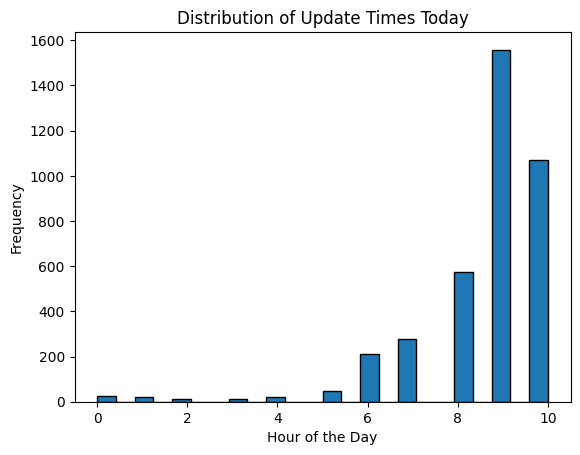

In [ ]:
import matplotlib.pyplot as plt

# Plot a histogram for the update times
plt.hist(todays_data['update_hour'], bins=24, edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Update Times Today')
plt.show()


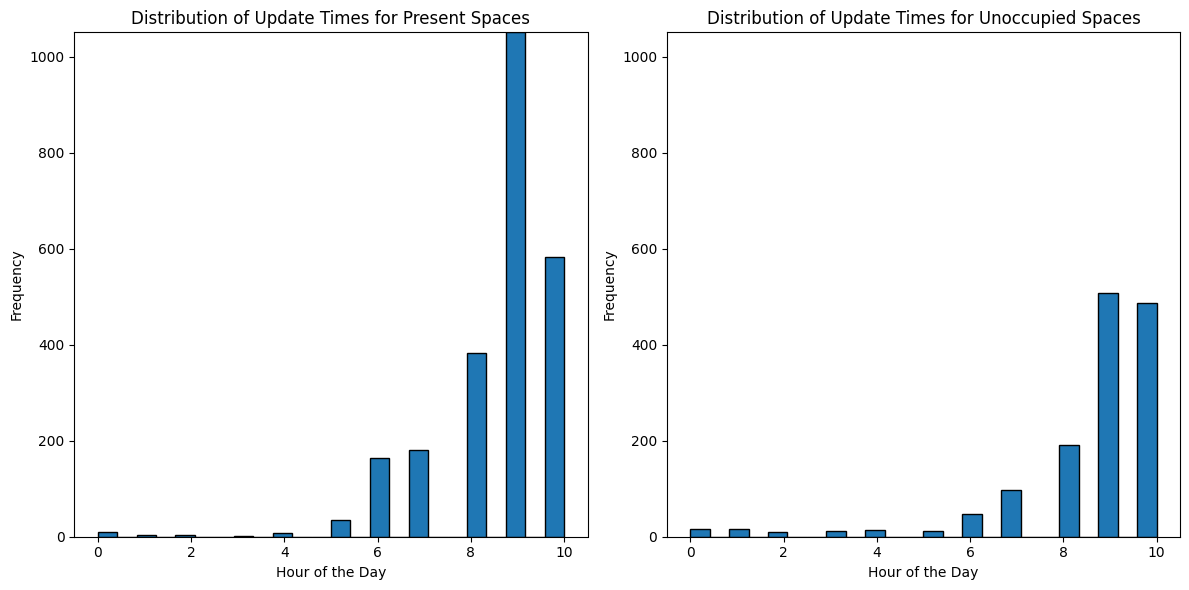

In [ ]:
import matplotlib.pyplot as plt

# Filter data for 'Present' and 'Unoccupied' states
present_data = todays_data[todays_data['status_description'] == 'Present']
unoccupied_data = todays_data[todays_data['status_description'] == 'Unoccupied']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Find the maximum frequency to set the same y-axis limit for both subplots
max_frequency = max(
    present_data['update_hour'].value_counts().max(),
    unoccupied_data['update_hour'].value_counts().max()
)

# Plot histogram for 'Present' state
axes[0].hist(present_data['update_hour'], bins=24, edgecolor='black')
axes[0].set_title('Distribution of Update Times for Present Spaces')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Frequency')
axes[0].set_ylim([0, max_frequency])

# Plot histogram for 'Unoccupied' state
axes[1].hist(unoccupied_data['update_hour'], bins=24, edgecolor='black')
axes[1].set_title('Distribution of Update Times for Unoccupied Spaces')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Frequency')
axes[1].set_ylim([0, max_frequency])

# Show the plots
plt.tight_layout()
plt.show()


## get bay id

In [ ]:
# On-street Parking Bays
SENSOR_DATASET = 'on-street-parking-bays'
bay_df  = fetch_parking_data(BASE_URL, SENSOR_DATASET, API_KEY)
bay_df

geo_point_2d  \
0     {'lon': 144.93563414798302, 'lat': -37.8227455...   
1     {'lon': 144.98461853185907, 'lat': -37.8299067...   
2     {'lon': 144.9743972514384, 'lat': -37.81577901...   
3     {'lon': 144.96743883205434, 'lat': -37.8110919...   
4     {'lon': 144.95435921055855, 'lat': -37.7849210...   
...                                                 ...   
9994  {'lon': 144.981172907813, 'lat': -37.809266435...   
9995  {'lon': 144.9697047894569, 'lat': -37.79748816...   
9996  {'lon': 144.96953780147317, 'lat': -37.7990112...   
9997  {'lon': 144.9568773900466, 'lat': -37.80935750...   
9998  {'lon': 144.98336403797197, 'lat': -37.8107854...   

                                              geo_shape rd_seg_id marker_id  \
0     {'type': 'Feature', 'geometry': {'coordinates'...     22131      None   
1     {'type': 'Feature', 'geometry': {'coordinates'...     22716    20086E   
2     {'type': 'Feature', 'geometry': {'coordinates'...     22630      None   
3     {'type': 'Feature', 'geometry': {'coordinates'...     20151      None   
4     {'type': 'Feature', 'geometry': {'coordinates'...      None      None   
...                                                 ...       ...       ...   
9994  {'type': 'Feature', 'geometry': {'coordinates'...     20897      None   
9995  {'type': 'Feature', 'geometry': {'coordinates'...     20817      None   
9996  {'type': 'Feature', 'geometry': {'coordinates'...     20710      None   
9997  {'type': 'Feature', 'geometry': {'coordinates'...      None     C6776   
9998  {'type': 'Feature', 'geometry': {'coordinates'...     21860    12095W   

     bay_id meter_id                                         rd_seg_dsc  \
0      7779     None  Lorimer Street between Boundary Street and Ing...   
1      3441     None  Anderson Street between Clowes Street and St L...   
2     20418     None  Wellington Parade South between Wellington Cre...   
3      8631     None  Russell Street between Little Bourke Street an...   
4     16657     None                                               None   
...     ...      ...                                                ...   
9994  23579     None  Eades Street between Victoria Parade and Alber...   
9995   1932     None  Elgin Street between Rathdowne Street and Drum...   
9996   1052     None  Faraday Street between Rathdowne Street and Dr...   
9997  18947     None                                               None   
9998   7931     IAW6  Clarendon Street between Grey Street and Alber...   

           last_edit  
0     20201223122252  
1     20201223122245  
2     20201208142017  
3     20201208140729  
4     20201208141616  
...              ...  
9994  20210426122440  
9995  20201223122240  
9996  20201223122240  
9997  20201208141838  
9998  20201223122252  

[9999 rows x 8 columns]

In [ ]:
## Extract latitude and longitude from the 'geo_point_2d' column
# bay_df['location_lat'] = bay_df['geo_point_2d'].apply(lambda x: x.get('lat', None))
#bay_df['location_lon'] = bay_df['geo_point_2d'].apply(lambda x: x.get('lon', None))
#
# Drop the original 'geo_point_2d' column
#bay_df.drop(columns=['geo_point_2d'], inplace=True)
#
## Display the DataFrame
#bay_df.head()

In [ ]:
import pandas as pd

# Replace 'your_download_link_here' with the actual download link
download_link = 'https://melbournetestbed.opendatasoft.com/api/explore/v2.1/catalog/datasets/on-street-parking-bays/exports/csv?lang=en&timezone=Australia%2FSydney&use_labels=true&delimiter=%2C'

# Read the CSV into a DataFrame
bay_df = pd.read_csv(download_link)

bay_df


Geo Point  \
0      -37.822745543141885, 144.93563414798302   
1      -37.829906719140936, 144.98461853185907   
2        -37.81577901759838, 144.9743972514384   
3       -37.81109191560869, 144.96743883205434   
4       -37.78492101931813, 144.95435921055855   
...                                        ...   
24710   -37.80354278805992, 144.90939323833106   
24711  -37.833092152695706, 144.97911760560535   
24712  -37.816704151071775, 144.96209122121158   
24713  -37.804767107741924, 144.94676736431666   
24714   -37.78519055317177, 144.95692436798726   

                                               Geo Shape  rd_seg_id marker_id  \
0      {"coordinates": [[[[144.935660692658, -37.8227...    22131.0       NaN   
1      {"coordinates": [[[[144.984609469935, -37.8298...    22716.0    20086E   
2      {"coordinates": [[[[144.974436061605, -37.8157...    22630.0       NaN   
3      {"coordinates": [[[[144.967478832912, -37.8111...    20151.0       NaN   
4      {"coordinates": [[[[144.95435109635, -37.78489...        NaN       NaN   
...                                                  ...        ...       ...   
24710  {"coordinates": [[[[144.909367127839, -37.8035...    21685.0       NaN   
24711  {"coordinates": [[[[144.979154326666, -37.8330...    22706.0       NaN   
24712  {"coordinates": [[[[144.96212717236, -37.81670...    20114.0     2002N   
24713  {"coordinates": [[[[144.946734125446, -37.8047...    21007.0       NaN   
24714  {"coordinates": [[[[144.956911967989, -37.7851...    22380.0       NaN   

       bay_id meter_id                                         rd_seg_dsc  \
0        7779      NaN  Lorimer Street between Boundary Street and Ing...   
1        3441      NaN  Anderson Street between Clowes Street and St L...   
2       20418      NaN  Wellington Parade South between Wellington Cre...   
3        8631      NaN  Russell Street between Little Bourke Street an...   
4       16657      NaN                                                NaN   
...       ...      ...                                                ...   
24710    8176      NaN  Sims Street between Dynon Road and Footscray Road   
24711    4809      NaN  Birdwood Avenue between Dallas Brooks Drive an...   
24712    9140      NaN  Collins Street between Elizabeth Street and Qu...   
24713    4684      NaN  Victoria Street between Curzon Street and Abbo...   
24714   14769      NaN  The Avenue between Leonard Street and Walker S...   

          last_edit  
0      2.020122e+13  
1      2.020122e+13  
2      2.020121e+13  
3      2.020121e+13  
4      2.020121e+13  
...             ...  
24710  2.020122e+13  
24711  2.020122e+13  
24712  2.020121e+13  
24713  2.020122e+13  
24714  2.020121e+13  

[24715 rows x 8 columns]

In [ ]:
bay_df['location_lat'], bay_df['location_lon'] = bay_df['Geo Point'].str.split(',', n=1).str

# Convert them to float for numerical operations
bay_df['location_lat'] = bay_df['location_lat'].astype(float)
bay_df['location_lon'] = bay_df['location_lon'].astype(float)

# Display the DataFrame
bay_df.head()

<ipython-input-27-6be6781613a6>:1: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  bay_df['location_lat'], bay_df['location_lon'] = bay_df['Geo Point'].str.split(',', n=1).str


Geo Point  \
0  -37.822745543141885, 144.93563414798302   
1  -37.829906719140936, 144.98461853185907   
2    -37.81577901759838, 144.9743972514384   
3   -37.81109191560869, 144.96743883205434   
4   -37.78492101931813, 144.95435921055855   

                                           Geo Shape  rd_seg_id marker_id  \
0  {"coordinates": [[[[144.935660692658, -37.8227...    22131.0       NaN   
1  {"coordinates": [[[[144.984609469935, -37.8298...    22716.0    20086E   
2  {"coordinates": [[[[144.974436061605, -37.8157...    22630.0       NaN   
3  {"coordinates": [[[[144.967478832912, -37.8111...    20151.0       NaN   
4  {"coordinates": [[[[144.95435109635, -37.78489...        NaN       NaN   

   bay_id meter_id                                         rd_seg_dsc  \
0    7779      NaN  Lorimer Street between Boundary Street and Ing...   
1    3441      NaN  Anderson Street between Clowes Street and St L...   
2   20418      NaN  Wellington Parade South between Wellington Cre...   
3    8631      NaN  Russell Street between Little Bourke Street an...   
4   16657      NaN                                                NaN   

      last_edit  location_lat  location_lon  
0  2.020122e+13    -37.822746    144.935634  
1  2.020122e+13    -37.829907    144.984619  
2  2.020121e+13    -37.815779    144.974397  
3  2.020121e+13    -37.811092    144.967439  
4  2.020121e+13    -37.784921    144.954359

In [ ]:
# Round latitude and longitude to 6 decimal places
df_analysis['location_lat'] = df_analysis['location_lat'].round(8)
df_analysis['location_lon'] = df_analysis['location_lon'].round(8)
bay_df['location_lat'] = bay_df['location_lat'].round(8)
bay_df['location_lon'] = bay_df['location_lon'].round(8)


In [ ]:
# Perform a left merge to add bay_id to df_analysis
df_analysis = pd.merge(df_analysis, bay_df[['location_lat', 'location_lon', 'bay_id']],
                       how='left',
                       left_on=['location_lat', 'location_lon'],
                       right_on=['location_lat', 'location_lon'])


In [ ]:
df_analysis

lastupdated          status_timestamp  zone_number  \
0    2023-07-20 05:44:36+00:00 2023-07-20 07:24:38+10:00       7358.0   
1    2023-07-20 05:44:36+00:00 2023-07-20 15:23:46+10:00       7358.0   
2    2023-07-20 05:44:36+00:00 2023-07-20 14:46:01+10:00       7358.0   
3    2023-07-24 06:44:36+00:00 2023-07-24 16:16:08+10:00       7638.0   
4    2023-07-24 06:44:36+00:00 2023-07-24 15:50:20+10:00       7638.0   
...                        ...                       ...          ...   
5170 2023-09-06 00:22:36+00:00 2023-09-06 07:19:00+10:00       7083.0   
5171 2023-09-06 00:22:36+00:00 2023-09-05 21:25:20+10:00       7083.0   
5172 2023-09-06 00:22:36+00:00 2023-09-06 06:04:22+10:00       7083.0   
5173 2023-09-06 00:22:36+00:00 2023-09-06 06:16:14+10:00       7083.0   
5174 2023-09-06 00:22:36+00:00 2023-09-06 09:38:37+10:00       7012.0   

     status_description  parkingbay_id  location_lat  location_lon  \
0            Unoccupied           7075    -37.814591    144.969350   
1               Present           7076    -37.814569    144.969424   
2            Unoccupied           7077    -37.814547    144.969500   
3            Unoccupied           5852    -37.813205    144.968283   
4            Unoccupied           5874    -37.813361    144.968354   
...                 ...            ...           ...           ...   
5170            Present           9033    -37.801963    144.958754   
5171         Unoccupied           9036    -37.801979    144.958900   
5172            Present           9040    -37.801998    144.959076   
5173            Present           9043    -37.801960    144.958725   
5174            Present           9084    -37.803109    144.959088   

     status_date   bay_id  
0     2023-07-20      NaN  
1     2023-07-20      NaN  
2     2023-07-20      NaN  
3     2023-07-24      NaN  
4     2023-07-24      NaN  
...          ...      ...  
5170  2023-09-06  10723.0  
5171  2023-09-05  10726.0  
5172  2023-09-06      NaN  
5173  2023-09-06  10733.0  
5174  2023-09-06      NaN  

[5175 rows x 9 columns]

In [ ]:
# Count the number of NaN values in the 'bay_id' column
num_nan = df_analysis['bay_id'].isna().sum()

print(f"There are {num_nan} NaN values in the 'bay_id' column.")


There are 3622 NaN values in the 'bay_id' column.


In [ ]:
# Filter to only include today's data
todays_data = df_analysis[df_analysis['bay_id'] == today_melbourne]

# Count the number of NaN values in the 'bay_id' column for today's data
num_nan_today = todays_data['bay_id'].isna().sum()

print(f"There are {num_nan_today} NaN values in the 'bay_id' column for today's data.")


There are 0 NaN values in the 'bay_id' column for today's data.


## get parking limit

In [ ]:
# Define the new dataset name for On-street Parking Bay Sensors
NEW_SENSOR_DATASET = 'on-street-car-park-bay-restrictions'
limit_df = fetch_parking_data(BASE_URL, NEW_SENSOR_DATASET, API_KEY)
print(limit_df.head())

   bayid  deviceid                    description1            description2  \
0   1500     30574  LZ 30MINS 722 M-F 7.30 to 6.30  2P MTR M-F 18:30-20:30   
1   8167     25546             1P M-SUN 7:30-23:00                    None   
2   8575     27944      2P RPA 1B 7:30-23:00 M-SUN                    None   
3   7981     25360         2P TKT M-SUN7:30AM-11PM                    None   
4   8152     25531             1P M-SUN 7:30-23:00                    None   

            description3 description4 description5 description6  \
0  2P MTR SAT 7:30-20:30         None         None         None   
1                   None         None         None         None   
2                   None         None         None         None   
3                   None         None         None         None   
4                   None         None         None         None   

   disabilityext1  disabilityext2  ...  today3  today4  today5  today6  \
0               0           240.0  ...     6.0     NaN

In [ ]:
limit_df

bayid  deviceid                    description1            description2  \
0      1500     30574  LZ 30MINS 722 M-F 7.30 to 6.30  2P MTR M-F 18:30-20:30   
1      8167     25546             1P M-SUN 7:30-23:00                    None   
2      8575     27944      2P RPA 1B 7:30-23:00 M-SUN                    None   
3      7981     25360         2P TKT M-SUN7:30AM-11PM                    None   
4      8152     25531             1P M-SUN 7:30-23:00                    None   
...     ...       ...                             ...                     ...   
4258   8247     25626             P5 M-SUN 7:30-18:30    1P M-SUN 6:30PM-11PM   
4259   3541     30469         3P MTR M-SAT 7:30-20:30                    None   
4260   8226     25614             1P M-SUN 7:30-23:00                    None   
4261   6281     26325         2P MTR M-SAT 7:30-18:30       2P SUN 7:30-18:30   
4262   5521     30083           2P MTR M-F 7:30-18:30   2P MTR SAT 7:30-12:30   

               description3 description4 description5 description6  \
0     2P MTR SAT 7:30-20:30         None         None         None   
1                      None         None         None         None   
2                      None         None         None         None   
3                      None         None         None         None   
4                      None         None         None         None   
...                     ...          ...          ...          ...   
4258                   None         None         None         None   
4259                   None         None         None         None   
4260                   None         None         None         None   
4261                   None         None         None         None   
4262                   None         None         None         None   

      disabilityext1  disabilityext2  ...  today3  today4  today5  today6  \
0                  0           240.0  ...     6.0     NaN     NaN     NaN   
1                120             NaN  ...     NaN     NaN     NaN     NaN   
2                240             NaN  ...     NaN     NaN     NaN     NaN   
3                240             NaN  ...     NaN     NaN     NaN     NaN   
4                120             NaN  ...     NaN     NaN     NaN     NaN   
...              ...             ...  ...     ...     ...     ...     ...   
4258              10           120.0  ...     NaN     NaN     NaN     NaN   
4259             360             NaN  ...     NaN     NaN     NaN     NaN   
4260             120             NaN  ...     NaN     NaN     NaN     NaN   
4261             240           240.0  ...     NaN     NaN     NaN     NaN   
4262             240           240.0  ...     NaN     NaN     NaN     NaN   

                 typedesc1  typedesc2  typedesc3  typedesc4  typedesc5  \
0     Loading Zone 30M 722   2P Meter   2P Meter       None       None   
1                       1P       None       None       None       None   
2                       2P       None       None       None       None   
3              2P Ticket A       None       None       None       None   
4                       1P       None       None       None       None   
...                    ...        ...        ...        ...        ...   
4258              P 05 Min         1P       None       None       None   
4259              3P Meter       None       None       None       None   
4260                    1P       None       None       None       None   
4261              2P Meter         2P       None       None       None   
4262              2P Meter   2P Meter       None       None       None   

      typedesc6  
0          None  
1          None  
2          None  
3          None  
4          None  
...         ...  
4258       None  
4259       None  
4260       None  
4261       None  
4262       None  

[4263 rows x 62 columns]

In [ ]:
# Merge df_analysis with only the relevant columns from limit_df
columns_to_merge = ['bayid', 'description1', 'description2', 'description3', 'description4', 'description5']
merged_df = pd.merge(df_analysis, limit_df[columns_to_merge], left_on='bay_id', right_on='bayid', how='left')

# Drop the 'bayid' column from the right DataFrame to avoid duplicate columns
merged_df.drop(columns=['bayid'], inplace=True)

# Display the DataFrame
print(merged_df.head())


                lastupdated          status_timestamp  zone_number  \
0 2023-07-20 05:44:36+00:00 2023-07-20 07:24:38+10:00       7358.0   
1 2023-07-20 05:44:36+00:00 2023-07-20 15:23:46+10:00       7358.0   
2 2023-07-20 05:44:36+00:00 2023-07-20 14:46:01+10:00       7358.0   
3 2023-07-24 06:44:36+00:00 2023-07-24 16:16:08+10:00       7638.0   
4 2023-07-24 06:44:36+00:00 2023-07-24 15:50:20+10:00       7638.0   

  status_description  parkingbay_id  location_lat  location_lon status_date  \
0         Unoccupied           7075    -37.814591    144.969350  2023-07-20   
1            Present           7076    -37.814569    144.969424  2023-07-20   
2         Unoccupied           7077    -37.814547    144.969500  2023-07-20   
3         Unoccupied           5852    -37.813205    144.968283  2023-07-24   
4         Unoccupied           5874    -37.813361    144.968354  2023-07-24   

   bay_id description1 description2 description3 description4 description5  
0     NaN          NaN     

#### isabled parking spaces

In [ ]:
# Columns to check for "DIS"
columns_to_check = ['description1', 'description2', 'description3', 'description4', 'description5']

# Find rows where any of the specified columns contain "DIS"
contains_dis = merged_df[columns_to_check].apply(lambda x: x.str.contains('DIS')).any(axis=1)

# Extract rows with "DIS" into a separate DataFrame
disabled_parking_df = merged_df[contains_dis]

# Delete rows with "DIS" from the original DataFrame
merged_df = merged_df[~contains_dis]

# Display the new DataFrames
print("Disabled Parking Data:")
print(disabled_parking_df.head())

print("Remaining Data:")
print(merged_df.head())


Disabled Parking Data:
Empty DataFrame
Columns: [lastupdated, status_timestamp, zone_number, status_description, parkingbay_id, location_lat, location_lon, status_date, bay_id, description1, description2, description3, description4, description5]
Index: []
Remaining Data:
                lastupdated          status_timestamp  zone_number  \
0 2023-07-20 05:44:36+00:00 2023-07-20 07:24:38+10:00       7358.0   
1 2023-07-20 05:44:36+00:00 2023-07-20 15:23:46+10:00       7358.0   
2 2023-07-20 05:44:36+00:00 2023-07-20 14:46:01+10:00       7358.0   
3 2023-07-24 06:44:36+00:00 2023-07-24 16:16:08+10:00       7638.0   
4 2023-07-24 06:44:36+00:00 2023-07-24 15:50:20+10:00       7638.0   

  status_description  parkingbay_id  location_lat  location_lon status_date  \
0         Unoccupied           7075    -37.814591    144.969350  2023-07-20   
1            Present           7076    -37.814569    144.969424  2023-07-20   
2         Unoccupied           7077    -37.814547    144.969500  2023

In [ ]:
# Columns to check for NaN values
columns_to_check = ['description1', 'description2', 'description3', 'description4', 'description5']

# Find rows where all specified columns are NaN
all_nan_rows = merged_df[columns_to_check].isna().all(axis=1)

# Count the number of such rows
num_all_nan_rows = all_nan_rows.sum()

# Display the count
print(f"Number of rows where all of the specified columns are NaN: {num_all_nan_rows}")


Number of rows where all of the specified columns are NaN: 5013


### today analysis 2

In [ ]:
from pandas.tseries.offsets import Minute

# Step 1: Create a copy of today's data
todays_data_copy = todays_data.copy()

# Step 2: Filter to only include rows where the parking space is vacant
vacant_indices = todays_data_copy[todays_data_copy['status_description'] == 'Unoccupied'].index

# Step 3: Subtract 60 minutes from the timestamp of these vacant spaces
todays_data_copy.loc[vacant_indices, 'status_timestamp'] = todays_data_copy.loc[vacant_indices, 'status_timestamp'] - Minute(60)

# Step 4: Update the 'status_date' column based on the new 'status_timestamp'
todays_data_copy['status_date'] = todays_data_copy['status_timestamp'].dt.date

# Step 4: Change the status of these advanced-time vacant spaces to 'Occupied'
todays_data_copy.loc[vacant_indices, 'status_description'] = 'Occupied'

# Step 5: Remove rows where the 'status_date' is not today
todays_data_copy = todays_data_copy[todays_data_copy['status_date'] == today_melbourne]



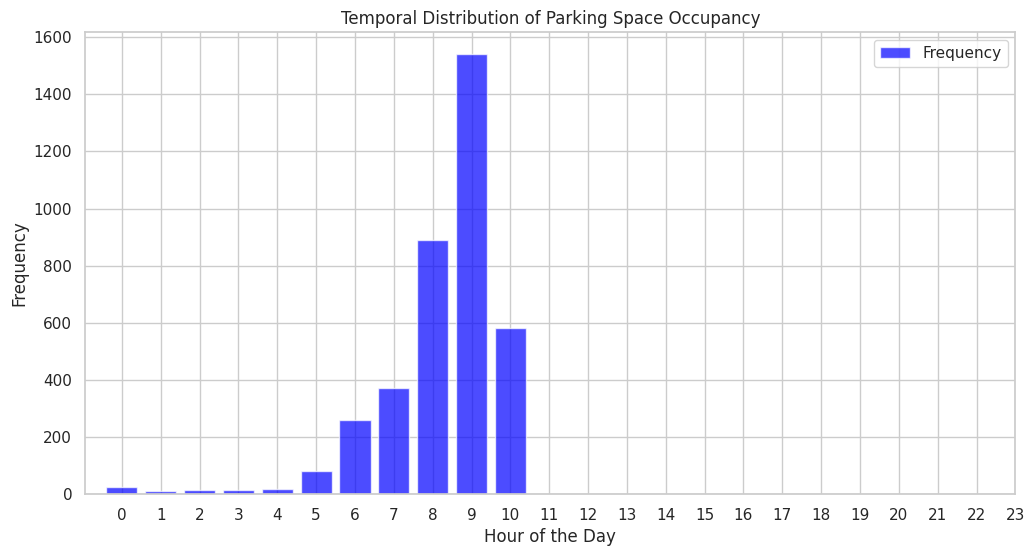

In [ ]:
import matplotlib.pyplot as plt

# Convert 'status_timestamp' to just the hour of the day
todays_data_copy['status_hour'] = todays_data_copy['status_timestamp'].dt.hour

# Create a frequency table for the update times
frequency_table = todays_data_copy['status_hour'].value_counts().sort_index()

# Plot a histogram for the update times
plt.figure(figsize=(12, 6))
plt.bar(frequency_table.index, frequency_table.values, color='blue', alpha=0.7, label='Frequency')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Temporal Distribution of Parking Space Occupancy')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend()
plt.show()



In [87]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import folium
import numpy as np

# Prepare the data
X = todays_data_copy[['location_lat', 'location_lon']].values

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.0005, min_samples=20)  # Adjust these parameters
labels = dbscan.fit_predict(X)

# Add the cluster labels to the original DataFrame
todays_data_copy['cluster'] = labels

# Initialize a Folium map
m = folium.Map(location=[-37.814, 144.963], zoom_start=16)

# Generate a list of colors
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink']

# Plot the clusters on the map
for cluster in np.unique(labels):
    if cluster == -1:
        # Skip the noise points, which are assigned a cluster of -1
        continue
    cluster_data = df_analysis[df_analysis['cluster'] == cluster]
    color = colors[cluster % len(colors)]
    for idx, row in cluster_data.iterrows():
        folium.CircleMarker(location=[row['location_lat'], row['location_lon']],
                            radius=5,
                            color=color,
                            fill=True,
                            fill_color=color).add_to(m)

# Show the map
m


In [88]:
from sklearn.cluster import DBSCAN
import folium

# Create a new DataFrame with only the latitude and longitude columns
X = todays_data_copy[['location_lat', 'location_lon']]

# Run DBSCAN clustering
dbscan = DBSCAN(eps=0.0005, min_samples=20)
labels = dbscan.fit_predict(X)

# Add cluster labels back to your DataFrame
todays_data_copy['cluster_label'] = labels

# Calculate the centroid of each cluster
cluster_centroids = todays_data_copy.groupby('cluster_label').agg({'location_lat': 'mean', 'location_lon': 'mean'}).reset_index()

# Initialize the map
m = folium.Map(location=[-37.814, 144.963], zoom_start=16)

# Add circles for each cluster
for idx, row in cluster_centroids.iterrows():
    if row['cluster_label'] != -1:  # -1 is the label for noise points in DBSCAN
        folium.Circle(
            location=[row['location_lat'], row['location_lon']],
            radius=50,  # You can change the radius based on your specific needs
            color='blue',
            fill=True,
            fill_color='blue'
        ).add_to(m)

# Show the map
m


In [ ]:
# Group by hour and count the number of 'Unoccupied' statuses
vacant_by_hour = df[df['status_description'] == 'Unoccupied'].groupby('hour').size()

# Calculate the vacancy rate
vacancy_rate_by_hour = (vacant_by_hour / total_parking_spaces) * 100


In [ ]:
# Group by weekday and count the number of 'Present' statuses
occupied_by_weekday = df[df['status_description'] == 'Present'].groupby('weekday').size()

# Calculate the occupancy rate
occupancy_rate_by_weekday = (occupied_by_weekday / total_parking_spaces) * 100


In [ ]:
# Group by weekday and count the number of 'Unoccupied' statuses
vacant_by_weekday = df[df['status_description'] == 'Unoccupied'].groupby('weekday').size()

# Calculate the vacancy rate
vacancy_rate_by_weekday = (vacant_by_weekday / total_parking_spaces) * 100


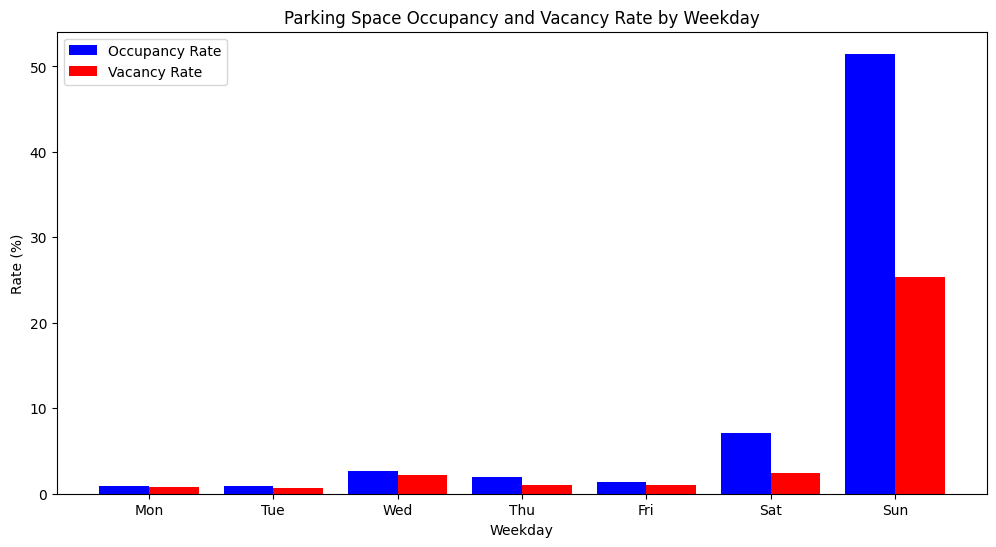

In [ ]:
plt.figure(figsize=(12, 6))

plt.bar(occupancy_rate_by_weekday.index - 0.2, occupancy_rate_by_weekday.values, width=0.4, label='Occupancy Rate', color='b')
plt.bar(vacancy_rate_by_weekday.index + 0.2, vacancy_rate_by_weekday.values, width=0.4, label='Vacancy Rate', color='r')

plt.title('Parking Space Occupancy and Vacancy Rate by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Rate (%)')
plt.legend()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


In [ ]:
# Find all duplicated rows based on all columns
duplicated_rows = parking_sensors[parking_sensors.duplicated()]

# To include the first occurrence of the duplicate in the output, you can do:
duplicated_rows_including_first = parking_sensors[parking_sensors.duplicated(keep=False)]

# Print out the duplicated rows
if duplicated_rows.empty:
    print("No exact duplicate entries found.")
else:
    print("Found exact duplicate entries:")
    print(duplicated_rows)

# Print out the duplicated rows including the first occurrence
if duplicated_rows_including_first.empty:
    print("No exact duplicate entries found including first occurrences.")
else:
    print("Found exact duplicate entries including first occurrences:")
    print(duplicated_rows_including_first)


No exact duplicate entries found.
No exact duplicate entries found including first occurrences.


In [ ]:
import pandas as pd

# Assuming parking_sensors is your DataFrame
parking_sensors = parking_sensors.sort_values(by=['parkingbay_id', 'status_timestamp'])

# Calculate time difference for each row
parking_sensors['delta'] = parking_sensors.groupby('parkingbay_id')['status_timestamp'].diff()

# Determine short-term and long-term parking based on conditions
parking_sensors['parking_type'] = 'unknown'  # Default value
mask_short_term = (parking_sensors['status_description'] == 'Present') & (parking_sensors['delta'].dt.total_seconds() <= 3600)
mask_long_term = (parking_sensors['status_description'] == 'Present') & (parking_sensors['delta'].dt.total_seconds() > 3600)

parking_sensors.loc[mask_short_term, 'parking_type'] = 'short-term'
parking_sensors.loc[mask_long_term, 'parking_type'] = 'long-term'

# Count the instances
short_term_count = (parking_sensors['parking_type'] == 'short-term').sum()
long_term_count = (parking_sensors['parking_type'] == 'long-term').sum()

print(f"Short-term parking instances: {short_term_count}")
print(f"Long-term parking instances: {long_term_count}")


Short-term parking instances: 202
Long-term parking instances: 8


In [ ]:
unique_timestamps = parking_sensors['status_timestamp'].nunique()
print(f"Number of unique timestamps: {unique_timestamps}")


Number of unique timestamps: 4382


In [ ]:
sample_bay = parking_sensors[parking_sensors['parkingbay_id'] == parking_sensors['parkingbay_id'].iloc[0]]
print(sample_bay[['status_timestamp', 'status_description']])

              status_timestamp status_description
4554 2023-09-02 06:21:19+10:00         Unoccupied


In [ ]:
import numpy as np
# Calculate mean and standard deviation for the occupancy rate
mean_rate = parking_sensors.groupby(parking_sensors['status_timestamp'].dt.hour)['status_description'].value_counts(normalize=True).unstack().fillna(0)['Present'].mean()
std_rate = parking_sensors.groupby(parking_sensors['status_timestamp'].dt.hour)['status_description'].value_counts(normalize=True).unstack().fillna(0)['Present'].std()

# Calculate hourly occupancy rate
parking_sensors['hour'] = parking_sensors['status_timestamp'].dt.hour
hourly_occupancy = parking_sensors.groupby('hour')['status_description'].value_counts(normalize=True).unstack().fillna(0)['Present']

# Compute the Z-scores for each hour
z_scores = (hourly_occupancy - mean_rate) / std_rate

# Detect anomalies where |Z| > 2
anomalies = z_scores[np.abs(z_scores) > 2]

print(anomalies)


Series([], Name: Present, dtype: float64)


### There seems to be only snapshot data. Try to cluster and visualize

In [ ]:
from sklearn.cluster import KMeans

# Use only occupied or unoccupied spots. Example for occupied:
occupied_spots = parking_sensors[parking_sensors['status_description'] == 'Present'][['location_lat', 'location_lon']]

kmeans = KMeans(n_clusters=5, n_init=10)  # Explicitly set n_init to 10
occupied_spots['cluster'] = kmeans.fit_predict(occupied_spots)
